# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [18]:
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [19]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx")

In [20]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

* *Tip: there's an option with `.read_csv` to only read in a certain number of rows*

In [21]:
df.shape

(81937, 15)

In [22]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [23]:
# Each row is an animal in the zoo.

In [24]:
# Spayed or Neut means: whether the ovaries, fallopian tubes and uterus of are removed from the animals

In [25]:
# Guard or Trained means: whether the animals are trained by the zoo stuff

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [26]:
# First need to remove spaces in column's name

df.columns = df.columns.str.replace(" ","")

In [27]:
df.PrimaryBreed.value_counts().head(10)

Unknown                                 12894
Yorkshire Terrier                        5133
Shih Tzu                                 4727
Chihuahua                                3924
Maltese                                  2965
Labrador Retriever                       2872
American Pit Bull Terrier/Pit Bull       2153
American Pit Bull Mix / Pit Bull Mix     2029
Labrador Retriever Crossbreed            1864
Beagle                                   1438
Name: PrimaryBreed, dtype: int64

<AxesSubplot:>

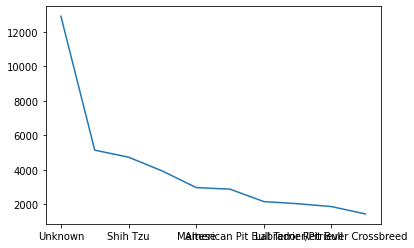

In [28]:
df.PrimaryBreed.value_counts().head(10).plot()

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

* *Tip: Maybe you want to go back to your `.read_csv` and use `na_values=`? Maybe not? Up to you!*

In [29]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", na_values= ["Unknown"])
df.columns = df.columns.str.replace(" ","")

<AxesSubplot:>

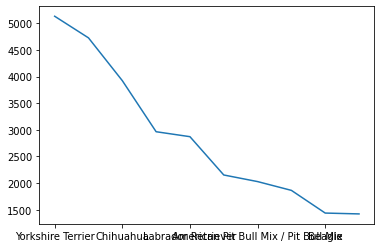

In [30]:
df.PrimaryBreed.value_counts().head(10).plot()

## What are the most popular dog names?

In [31]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", na_values= ["Unknown","UNKNOWN"])
df.columns = df.columns.str.replace(" ","")
df.AnimalName.value_counts()

Bella                  527
Max                    515
Charlie                403
Lola                   387
Rocky                  354
                      ... 
Max P.P.                 1
Nyxie Maldonado          1
ROSEBUD                  1
Lucas Fasitta Falco      1
Cheeseburger             1
Name: AnimalName, Length: 29675, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [32]:
df[df.AnimalName.str.contains("Max",na=False)].AnimalName.value_counts()
# 515 dogs named Max
# 30 dogs named Maxwell

Max                 515
Maximus              63
Maxwell              30
Maxine               20
Maxx                 16
                   ... 
Max Yauri             1
King Maximillion      1
Max Mezon             1
Max Datri             1
Max Blue              1
Name: AnimalName, Length: 192, dtype: int64

## What percentage of dogs are guard dogs?

In [33]:
df.GuardorTrained.value_counts(normalize=True)

No     0.998971
Yes    0.001029
Name: GuardorTrained, dtype: float64

## What are the actual numbers?

In [34]:
df.GuardorTrained.value_counts()
# only 51 dogs are trained/guard dogs.

No     49525
Yes       51
Name: GuardorTrained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`. Think about missing data!

In [35]:
df.GuardorTrained.value_counts()
# it might be because the computer filter "NaN" & empty blank to read?

No     49525
Yes       51
Name: GuardorTrained, dtype: int64

## Maybe fill in all of those empty "Guard or Trained" columns with "No"? Or as `NaN`? 

Can we make an assumption either way? Then check your result with another `.value_counts()`

In [36]:
# dropna=True meaning Don't include counts of NaN!!
df.GuardorTrained.value_counts(dropna=False)

No     49525
NaN    32361
Yes       51
Name: GuardorTrained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [37]:
df[df.GuardorTrained == "Yes"].PrimaryBreed.value_counts().head()
# German Shepherd Dog is the top dog breed for guard dogs

German Shepherd Dog                     4
Chihuahua                               3
Labrador Retriever                      3
Rottweiler                              3
American Pit Bull Mix / Pit Bull Mix    3
Name: PrimaryBreed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [38]:
df['AnimalBirth'].apply(lambda birth: birth.year)

0        2007
1        2013
2        2014
3        2008
4        2014
         ... 
81932    2013
81933    2015
81934    2009
81935    2006
81936    2000
Name: AnimalBirth, Length: 81937, dtype: int64

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [39]:
zn = pd.read_csv("zipcodes-neighborhoods.csv")
zn

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx
...,...,...,...
173,South Shore,10312,Staten Island
174,Stapleton and St. George,10301,Staten Island
175,Stapleton and St. George,10304,Staten Island
176,Stapleton and St. George,10305,Staten Island


In [40]:
# zn: the dataframe you're about to merge
# left_on: the index column name from left dataframe (your original dataframe)
# right_on: the index column name from left dataframe (the dataframe you're about to merge)
merged = df.merge(zn, left_on='OwnerZipCode', right_on='zip')
merged

,OwnerZipCode,AnimalName,AnimalGender,PrimaryBreed,SecondaryBreed,AnimalDominantColor,AnimalSecondaryColor,AnimalThirdColor,AnimalBirth,SpayedorNeut,GuardorTrained,Vaccinated,ApplicationDate,LicenseIssuedDate,LicenseExpiredDate,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,Upper West Side,10024,Manhattan
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,NaN,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,Upper West Side,10024,Manhattan
4,10024,Harlen,M,NaN,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,Upper West Side,10024,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80854,11005,Bichon,F,Bichon Frise,NaN,White,NaN,NaN,2015-05-01,No,NaN,No,2015-08-06 18:46:01.953,2015-08-06,2016-08-06,Southeast Queens,11005,Queens
80855,10020,Fantastic,F,NaN,Whippet/Jack Russell Mix,WHITE,NaN,NaN,2012-01-01,Yes,No,No,2015-12-01 15:07:00.293,2015-12-01,2016-12-26,Chelsea and Clinton,10020,Manhattan
80856,10020,Dexter,M,Golden Retriever,NaN,GOLD,WHITE,NaN,2010-08-01,Yes,No,Yes,2016-02-26 16:10:43.557,2016-02-26,2017-04-25,Chelsea and Clinton,10020,Manhattan
80857,10020,ELLA,F,Havanese,NaN,Black,White,NaN,2015-02-01,Yes,NaN,Yes,2016-03-22 15:31:09.393,2016-03-22,2017-05-08,Chelsea and Clinton,10020,Manhattan


## What is the most common dog breed in each of the neighborhoods of NYC?

* *Tip: There are a few ways to do this, and some are awful (see the "top 5 breeds in each borough" question below).*

In [79]:
merged.groupby(by="neighborhood").PrimaryBreed.value_counts().groupby(level=0).nlargest(1)

neighborhood                   neighborhood                   PrimaryBreed                      
Borough Park                   Borough Park                   Yorkshire Terrier                     115
Bronx Park and Fordham         Bronx Park and Fordham         Yorkshire Terrier                      88
Bushwick and Williamsburg      Bushwick and Williamsburg      Yorkshire Terrier                     135
Canarsie and Flatlands         Canarsie and Flatlands         Yorkshire Terrier                     137
Central Bronx                  Central Bronx                  Yorkshire Terrier                      82
Central Brooklyn               Central Brooklyn               Shih Tzu                              113
Central Harlem                 Central Harlem                 Yorkshire Terrier                     132
Central Queens                 Central Queens                 Yorkshire Terrier                      67
Chelsea and Clinton            Chelsea and Clinton            Chihuahua

## What breed of dogs are the least likely to be spayed? Male or female?

* *Tip: This has a handful of interpretations, and some are easier than others. Feel free to skip it if you can't figure it out to your satisfaction.*

In [191]:
# method 1 (but can't really see the male dogs data here...)
df[df.SpayedorNeut == "No"].groupby(by="AnimalGender").PrimaryBreed.value_counts()

AnimalGender  PrimaryBreed               
F             Yorkshire Terrier              637
              Shih Tzu                       416
              Chihuahua                      313
              Maltese                        301
              Pomeranian                     173
                                            ... 
M             Spinone Italiano                 1
              Standard Schnauzer               1
              Thai Ridgeback                   1
              Treeing Tennessee Brindle        1
              Wirehaired Pointing Griffon      1
Name: PrimaryBreed, Length: 413, dtype: int64

In [192]:
# method 2 (create 2 varibles!)
# Female dogs that are least likely to be spayed ---> Yorkshire Terrier
df.AnimalGender == "F"
df_female = df[df.AnimalGender == "F"]
df_female[df_female.SpayedorNeut == "No"].PrimaryBreed.value_counts()

Yorkshire Terrier             637
Shih Tzu                      416
Chihuahua                     313
Maltese                       301
Pomeranian                    173
                             ... 
Entlebucher Mountain Dog        1
German Shorthaired Pointer      1
Jindo                           1
Canaan Dog                      1
Spinone Italiano                1
Name: PrimaryBreed, Length: 196, dtype: int64

In [193]:
# Male dogs that are least likely to be spayed ---> Yorkshire Terrier
df.AnimalGender == "M"
df_male = df[df.AnimalGender == "M"]
df_male[df_male.SpayedorNeut == "No"].PrimaryBreed.value_counts()

Yorkshire Terrier                     925
Shih Tzu                              711
Maltese                               473
Chihuahua                             432
American Pit Bull Terrier/Pit Bull    354
                                     ... 
Clumber Spaniel                         1
Glen of Imaal Terrier                   1
Boerboel                                1
Bouvier Des Flandres                    1
Schipperkee                             1
Name: PrimaryBreed, Length: 217, dtype: int64

## Make a new column called `monochrome` that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [194]:
df["monochrome"] = ""

In [195]:
df_3color = df[df.AnimalThirdColor.isna()]

In [196]:
df_2color = df_3color[df_3color.AnimalSecondaryColor.isna()]

In [197]:
df_1color = df_2color[df_2color.AnimalDominantColor.isin(["BLACK","WHITE","Gray","GRAY"])]

In [198]:
#df = df.drop("monochrome", axis = 1)

df_1color.monochrome = True


/var/folders/jg/7jsjjz6d6g5cxdkqkqxtc68w0000gn/T/ipykernel_46023/1039498092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1color.monochrome = True


In [199]:
df_1color.monochrome.value_counts()

# There 6959 animals are monochrome.
## but how should I SAVE df_1color.monochrome = True back to the main dataframe?

True    6959
Name: monochrome, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

In [1]:
merged.borough.value_counts()#.plot()

NameError: name 'merged' is not defined

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

<AxesSubplot:xlabel='borough,borough,PrimaryBreed'>

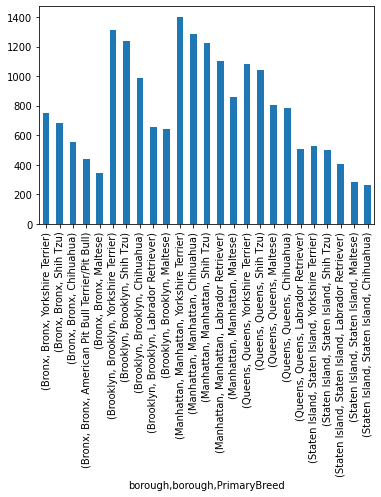

In [77]:
# method 1 (with one line!)
merged.groupby(by="borough").PrimaryBreed.value_counts().groupby(level=0).nlargest(5).plot(kind="bar")

In [70]:
# Tips for myself in case I forget!!:
# .groupby(level=0) 其实意味着你在原来valuecount的基础上，重新按照现存的两个变量来分类（这里分别为borough & PrimaryBreed）
# 如果level = 0 那么就如题干，得出每一个区的每个狗的品种数量（value_counts)--->.nlargest(5)是用来限制top 5的，可以随时修改
# 如果level = 1 那么得出的结果就是 ---> 每种狗品种在每个区的数量，按数量排序 --->.nlargest(5)同样是用来限制top 5，可以随时修改

In [71]:
# method 2 (create five different varibles and then take the top 5 number)

merged_Manhattan = merged[merged.borough == "Manhattan"]
merged_Manhattan.PrimaryBreed.value_counts().head(5)

Yorkshire Terrier     1402
Chihuahua             1287
Shih Tzu              1227
Labrador Retriever    1100
Maltese                856
Name: PrimaryBreed, dtype: int64

In [72]:
merged_Brooklyn = merged[merged.borough == "Brooklyn"]
merged_Brooklyn.PrimaryBreed.value_counts().head(5)

Yorkshire Terrier     1316
Shih Tzu              1236
Chihuahua              987
Labrador Retriever     655
Maltese                640
Name: PrimaryBreed, dtype: int64

In [73]:
merged_Queens = merged[merged.borough == "Queens"]
merged_Queens.PrimaryBreed.value_counts().head(5)

Yorkshire Terrier     1085
Shih Tzu              1042
Maltese                806
Chihuahua              784
Labrador Retriever     505
Name: PrimaryBreed, dtype: int64

In [74]:
merged_Bronx = merged[merged.borough == "Bronx"]
merged_Bronx.PrimaryBreed.value_counts().head(5)

Yorkshire Terrier                     753
Shih Tzu                              682
Chihuahua                             553
American Pit Bull Terrier/Pit Bull    442
Maltese                               345
Name: PrimaryBreed, dtype: int64

In [75]:
merged_StatenIsland  = merged[merged.borough == "Staten Island"]
merged_StatenIsland.PrimaryBreed.value_counts().head(5)

Yorkshire Terrier     525
Shih Tzu              501
Labrador Retriever    404
Maltese               284
Chihuahua             261
Name: PrimaryBreed, dtype: int64